In [39]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '55c589a2-2348-4fb0-81c2-9a4c9a44c808',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-07-04T07:52:18.995Z', 'error_code': 0, 'error_message': None, 'elapsed': 46, 'credit_count': 1, 'notice': None, 'total_count': 10311}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10271, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [40]:
type(data)

dict

In [41]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [42]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/ff/5z0rmxy95cl5lfnczb_gnj9w0000gn/T/ipykernel_89798/644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10271,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941938e+07,1.941938e+07,False,NaN,1,NaN,NaN,None,2023-07-04T07:50:00.000Z,30942.150012,1.602173e+10,41.8419,-0.226764,0.728924,1.792917,14.036673,6.338900,8.469439,6.008772e+11,49.5185,6.497852e+11,None,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:20.250124
1,1027,Ethereum,ETH,ethereum,7062,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202191e+08,1.202191e+08,True,NaN,2,NaN,NaN,None,2023-07-04T07:50:00.000Z,1951.290134,7.408548e+09,2.0590,-0.184435,-0.941671,4.121199,2.721398,2.885851,2.123256,2.345823e+11,19.3320,2.345823e+11,None,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:20.250124
2,825,Tether,USDT,tether,56153,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.335272e+10,8.573353e+10,True,NaN,3,NaN,NaN,None,2023-07-04T07:50:00.000Z,1.000140,2.625303e+10,22.9411,0.004841,-0.022884,0.020437,-0.002966,-0.051035,0.007123,8.336438e+10,6.8649,8.574552e+10,None,2023-07-04T07:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-04 07:52:20.250124
3,1839,BNB,BNB,bnb,1475,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558508e+08,1.558508e+08,False,NaN,4,NaN,NaN,None,2023-07-04T07:50:00.000Z,245.322300,6.516285e+08,26.9544,-0.206589,-1.695126,2.908101,-20.037376,-24.498895,-22.102869,3.823367e+10,3.1511,3.823367e+10,None,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:20.250124
4,3408,USD Coin,USDC,usd-coin,13183,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.766647e+10,2.766647e+10,False,NaN,5,NaN,NaN,None,2023-07-04T07:50:00.000Z,0.999945,3.596897e+09,24.2980,0.002244,-0.057051,0.008033,0.008635,-0.020283,0.023468,2.766495e+10,2.2782,2.766495e+10,None,2023-07-04T07:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-04 07:52:20.250124
5,52,XRP,XRP,xrp,971,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-07-04T07:50:00.000Z,0.488468,1.014271e+09,13.1059,-0.175760,1.452972,1.949948,-6.832724,5.758074,-6.568954,2.552454e+10,2.1019,4.884679e+10,None,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:20.250124
6,2010,Cardano,ADA,cardano,847,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.495593e+10,3.593697e+10,False,NaN,7,NaN,NaN,None,2023-07-04T07:50:00.000Z,0.296354,2.078612e+08,11.4743,-0.340354,0.365158,4.826371,-21.917072,-23.967980,-25.137168,1.035933e+10,0.8537,1.333593e+10,None,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:20.250124
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400306e+11,1.400306e+11,True,NaN,8,NaN,NaN,None,2023-07-04T07:50:00.000Z,0.068330,2.948012e+08,-10.0859,-0.396503,0.239198,4.770940,-6.243280,-13.263323,-29.446261,9.568306e+09,0.7882,9.568306e+09,None,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:20.250124
8,2,Litecoin,LTC,litecoin,932,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",8.400000e+07,7.328

In [43]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '55c589a2-2348-4fb0-81c2-9a4c9a44c808',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    
    if not os.path.isfile(r'/Users/nicholas/YT Data Analyst Portfolio Projects/Project 6 - Crypto API Web Scraper/API.csv'):
        df.to_csv(r'/Users/nicholas/YT Data Analyst Portfolio Projects/Project 6 - Crypto API Web Scraper/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/nicholas/YT Data Analyst Portfolio Projects/Project 6 - Crypto API Web Scraper/API.csv', mode='a', header=False)


In [44]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # runs every minute
exit()

/var/folders/ff/5z0rmxy95cl5lfnczb_gnj9w0000gn/T/ipykernel_89798/3778757483.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


/var/folders/ff/5z0rmxy95cl5lfnczb_gnj9w0000gn/T/ipykernel_89798/3778757483.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


/var/folders/ff/5z0rmxy95cl5lfnczb_gnj9w0000gn/T/ipykernel_89798/3778757483.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


/var/folders/ff/5z0rmxy95cl5lfnczb_gnj9w0000gn/T/ipykernel_89798/3778757483.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed successfully


KeyboardInterrupt: 

In [45]:
final_csv = pd.read_csv(r'/Users/nicholas/YT Data Analyst Portfolio Projects/Project 6 - Crypto API Web Scraper/API.csv')
final_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10271,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.941938e+07,1.941938e+07,False,NaN,1,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,30942.150012,1.602173e+10,41.8419,-0.226764,0.728924,1.792917,14.036673,6.338900,8.469439,6.008772e+11,49.5185,6.497852e+11,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
1,1,1027,Ethereum,ETH,ethereum,7062,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202191e+08,1.202191e+08,True,NaN,2,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,1951.290134,7.408548e+09,2.0590,-0.184435,-0.941671,4.121199,2.721398,2.885851,2.123256,2.345823e+11,19.3320,2.345823e+11,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
2,2,825,Tether,USDT,tether,56153,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.335272e+10,8.573353e+10,True,NaN,3,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,1.000140,2.625303e+10,22.9411,0.004841,-0.022884,0.020437,-0.002966,-0.051035,0.007123,8.336438e+10,6.8649,8.574552e+10,NaN,2023-07-04T07:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-04 07:52:24.673940
3,3,1839,BNB,BNB,bnb,1475,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558508e+08,1.558508e+08,False,NaN,4,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,245.322300,6.516285e+08,26.9544,-0.206589,-1.695126,2.908101,-20.037376,-24.498895,-22.102869,3.823367e+10,3.1511,3.823367e+10,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
4,4,3408,USD Coin,USDC,usd-coin,13183,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.766647e+10,2.766647e+10,False,NaN,5,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.999945,3.596897e+09,24.2980,0.002244,-0.057051,0.008033,0.008635,-0.020283,0.023468,2.766495e+10,2.2782,2.766495e+10,NaN,2023-07-04T07:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-04 07:52:24.673940
5,5,52,XRP,XRP,xrp,971,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.488468,1.014271e+09,13.1059,-0.175760,1.452972,1.949948,-6.832724,5.758074,-6.568954,2.552454e+10,2.1019,4.884679e+10,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
6,6,2010,Cardano,ADA,cardano,847,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.495593e+10,3.593697e+10,False,NaN,7,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.296354,2.078612e+08,11.4743,-0.340354,0.365158,4.826371,-21.917072,-23.967980,-25.137168,1.035933e+10,0.8537,1.333593e+10,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
7,7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.400306e+11,1.400306e+11,True,NaN,8,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.068330,2.948012e+08,-10.0859,-0.396503,0.239198,4.770940,-6.243280,-13.263323,-29.446261,9.568306e+09,0.7882,9.568306e+09,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
8,8,2,Litecoin,LTC,litecoin,932,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha..."

In [46]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [48]:
df = final_csv
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10271,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19419375.00000,19419375.00000,False,NaN,1,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,30942.15001,16021731826.89448,41.84190,-0.22676,0.72892,1.79292,14.03667,6.33890,8.46944,600877214385.21191,49.51850,649785150247.59998,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
1,1,1027,Ethereum,ETH,ethereum,7062,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120219082.75729,120219082.75729,True,NaN,2,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,1951.29013,7408547768.07110,2.05900,-0.18443,-0.94167,4.12120,2.72140,2.88585,2.12326,234582310150.74832,19.33200,234582310150.75000,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
2,2,825,Tether,USDT,tether,56153,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83352722599.90813,85733529362.29857,True,NaN,3,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,1.00014,26253026134.65765,22.94110,0.00484,-0.02288,0.02044,-0.00297,-0.05104,0.00712,83364381424.25966,6.86490,85745521198.06000,NaN,2023-07-04T07:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-04 07:52:24.673940
3,3,1839,BNB,BNB,bnb,1475,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155850773.74960,155850773.74960,False,NaN,4,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,245.32230,651628513.50274,26.95440,-0.20659,-1.69513,2.90810,-20.03738,-24.49889,-22.10287,38233670312.37315,3.15110,38233670312.37000,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
4,4,3408,USD Coin,USDC,usd-coin,13183,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,27666473753.20434,27666473753.20434,False,NaN,5,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.99995,3596897362.77555,24.29800,0.00224,-0.05705,0.00803,0.00863,-0.02028,0.02347,27664953226.28181,2.27820,27664953226.28000,NaN,2023-07-04T07:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-04 07:52:24.673940
5,5,52,XRP,XRP,xrp,971,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52254289650.00000,99988655562.00000,False,NaN,6,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.48847,1014271097.26018,13.10590,-0.17576,1.45297,1.94995,-6.83272,5.75807,-6.56895,25524541142.68958,2.10190,48846786194.31000,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
6,6,2010,Cardano,ADA,cardano,847,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34955927015.43000,35936967442.34000,False,NaN,7,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.29635,207861201.40575,11.47430,-0.34035,0.36516,4.82637,-21.91707,-23.96798,-25.13717,10359331274.69235,0.85370,13335933192.54000,NaN,2023-07-04T07:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-04 07:52:24.673940
7,7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140030576383.70520,140030576383.70520,True,NaN,8,NaN,NaN,NaN,2023-07-04T07:50:00.000Z,0.06833,294801210.45734,-10.08590,-0.39650,0.23920,4.77094,-6.24328,-13.26332,-29.44626,9568305592.71716,0.78820,9568305592.72000,NaN,2023-07-04T07:50:0

In [49]:
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.22239,0.77573,1.60935,13.99147,6.30373,8.48329
Ethereum,-0.17693,-0.89446,3.93013,2.69830,2.86968,2.15282
Tether,-0.00415,-0.00609,0.01021,0.00130,-0.03170,0.01431
BNB,-0.17738,-1.79695,2.79632,-20.07275,-24.51489,-22.11537
USD Coin,0.00172,-0.03785,0.00221,0.01755,0.00174,0.04129
XRP,-0.10022,1.47744,1.88288,-6.85009,5.76142,-6.59934
Cardano,-0.28211,0.34331,4.76912,-21.99471,-23.99876,-25.18030
Dogecoin,-0.32905,0.15642,4.66733,-6.29531,-13.31408,-29.48413
Litecoin,-0.43298,-4.69380,21.34125,12.12503,21.81861,13.24473


In [50]:
df3 = df2.stack()
df3

name                                         
Bitcoin          quote.USD.percent_change_1h    -0.22239
                 quote.USD.percent_change_24h    0.77573
                 quote.USD.percent_change_7d     1.60935
                 quote.USD.percent_change_30d   13.99147
                 quote.USD.percent_change_60d    6.30373
                                                  ...   
Wrapped Bitcoin  quote.USD.percent_change_24h    0.76588
                 quote.USD.percent_change_7d     1.96058
                 quote.USD.percent_change_30d   14.14261
                 quote.USD.percent_change_60d    6.40286
                 quote.USD.percent_change_90d    8.41306
Length: 96, dtype: float64

In [51]:
df4 = df3.to_frame(name='values')
df4

values
name                                                 
Bitcoin         quote.USD.percent_change_1h  -0.22239
                quote.USD.percent_change_24h  0.77573
                quote.USD.percent_change_7d   1.60935
                quote.USD.percent_change_30d 13.99147
                quote.USD.percent_change_60d  6.30373
...                                               ...
Wrapped Bitcoin quote.USD.percent_change_24h  0.76588
                quote.USD.percent_change_7d   1.96058
                quote.USD.percent_change_30d 14.14261
                quote.USD.percent_change_60d  6.40286
                quote.USD.percent_change_90d  8.41306

[96 rows x 1 columns]

In [65]:
df4.count()['values']

96

In [68]:
index = pd.Index(range(df4.count()['values']))

df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22239
1,Bitcoin,quote.USD.percent_change_24h,0.77573
2,Bitcoin,quote.USD.percent_change_7d,1.60935
3,Bitcoin,quote.USD.percent_change_30d,13.99147
4,Bitcoin,quote.USD.percent_change_60d,6.30373
...,...,...,...
91,Wrapped Bitcoin,quote.USD.percent_change_24h,0.76588
92,Wrapped Bitcoin,quote.USD.percent_change_7d,1.96058
93,Wrapped Bitcoin,quote.USD.percent_change_30d,14.14261
94,Wrapped Bitcoin,quote.USD.percent_change_60d,6.40286


In [81]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.22239
1,Bitcoin,quote.USD.percent_change_24h,0.77573
2,Bitcoin,quote.USD.percent_change_7d,1.60935
3,Bitcoin,quote.USD.percent_change_30d,13.99147
4,Bitcoin,quote.USD.percent_change_60d,6.30373
...,...,...,...
91,Wrapped Bitcoin,quote.USD.percent_change_24h,0.76588
92,Wrapped Bitcoin,quote.USD.percent_change_7d,1.96058
93,Wrapped Bitcoin,quote.USD.percent_change_30d,14.14261
94,Wrapped Bitcoin,quote.USD.percent_change_60d,6.40286


In [82]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,-0.22239
1,Bitcoin,24h,0.77573
2,Bitcoin,7d,1.60935
3,Bitcoin,30d,13.99147
4,Bitcoin,60d,6.30373
...,...,...,...
91,Wrapped Bitcoin,24h,0.76588
92,Wrapped Bitcoin,7d,1.96058
93,Wrapped Bitcoin,30d,14.14261
94,Wrapped Bitcoin,60d,6.40286


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

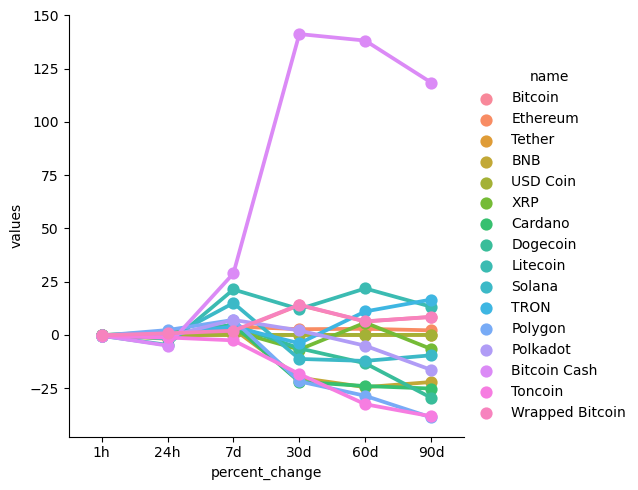

In [83]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [96]:
df7 = df[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7['timestamp'] = df7['timestamp'][:2]
df7

,name,quote.USD.price,timestamp
0,Bitcoin,30942.15001,2023-07-04 07:52:24.673940
15,Bitcoin,30939.20788,2023-07-04 07:53:25.120636
30,Bitcoin,30937.28133,2023-07-04 07:54:25.495490
45,Bitcoin,30937.28133,2023-07-04 07:55:25.873033


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

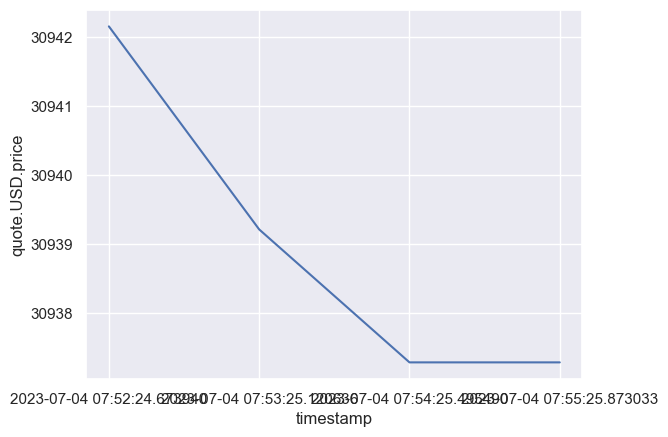

In [88]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data=df7)